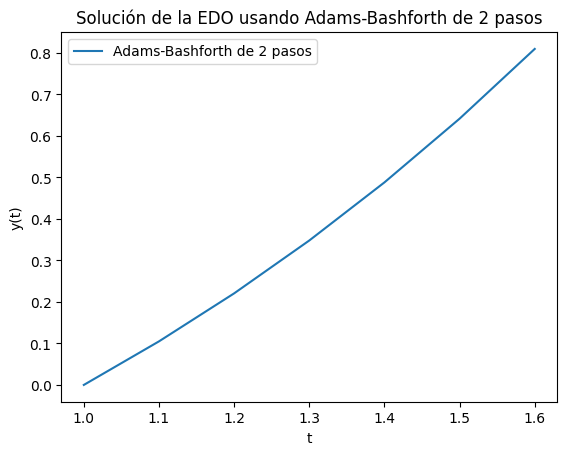

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_orden_2(edo, t, y, h):
    """Implementación del método de Runge-Kutta de orden 2, algoritmo numérico utilizado para resolver ecuaciones diferenciales ordinarias (EDO)"""
    k1 = h * edo(t, y)
    k2 = h * edo(t + h, y + k1)
    y_siguiente = y + 0.5 * (k1 + k2)
    return y_siguiente

def adams_bashforth_dos_pasos(edo, valores_t, y0, h):
    """Implementación del método de Adams-Bashforth de dos pasos, algoritmo de integración numérica utilizado para resolver ecuaciones diferenciales
     ordinarias (EDO). Este método pertenece a la familia de métodos de pasos múltiples"""
    num_pasos = len(valores_t)
    valores_y = np.zeros(num_pasos)

    # Inicialización utilizando Runge-Kutta de orden 2
    valores_y[0] = y0
    valores_y[1] = runge_kutta_orden_2(edo, valores_t[0], valores_y[0], h)

    for i in range(2, num_pasos):
        # Método de Adams-Bashforth de dos pasos
        valores_y[i] = valores_y[i-1] + (h / 2) * (3 * edo(valores_t[i-1], valores_y[i-1]) - edo(valores_t[i-2], valores_y[i-2]))

    return valores_y

def ecuacion_diferencial(t, y):
    """una ecuación diferencial"""
    return 1 + y/t + (y/t)**2

# Definir parámetros del problema
t_inicial, t_final = 1.0, 1.5
h = 0.1
y0 = 0

# Generar valores de t para la solución
valores_t = np.arange(t_inicial, t_final + h, h)

# Resolver la EDO usando Adams-Bashforth de dos pasos
valores_y = adams_bashforth_dos_pasos(ecuacion_diferencial, valores_t, y0, h)

# Graficar la solución
plt.plot(valores_t, valores_y, label='Adams-Bashforth de 2 pasos')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución de la EDO usando Adams-Bashforth de 2 pasos')
plt.legend()
plt.show()

#Estoy cansado jefe, es el final del semestre y llevo toda la semana en pruebas, lamento si me equivoque en algo, que tenga una lindas fiestas

